# Whether Weather Impacts School Attendance - Group 2

Our project explores whether there is a connection between weather conditions and student absences. By analyzing attendance records alongside weather data, we aim to determine if certain daily weather patterns or events are linked to changes in student’s absences. Our analysis could provide valuable insights into the impact of weather on school attendance rates, potentially informing future school policies and decision-making.

<b>Main Question:</b> 
1. How much of a correlation is there between NYC weather and absences in NYC schools?

<b>Other Questions:</b> 
1. Does rain and snow accumulation lead to an increase in absences?
2. Is there a correlation between the daily high or low temperature and the number of absences?
3. How are school districts from different boroughs affected by weather relative to others?

In [57]:
# ! pip install --user --upgrade pandas
# ! pip install --user --upgrade  ipywidgets matplotlib
# ! jupyter nbextension enable --py widgetsnbextension
# ! pip install folium
# ! pip install geopandas

In [2]:
import pandas as pd #DS
from ipywidgets import widgets, interactive, Layout
import pandas as pd 
import folium #This is the map package 
from folium.plugins import MarkerCluster #used to mark items on the map
import folium
import geopandas as gpd #Using Geographic information and making maps up
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Understanding Data

The date for this project comes from 2 different sources. We used weather data from the National Oceanic and Atmospheric Association (NOAA) National Center for Environmental Information. The attendance data is from New York City’s Department of Education provided by NYC Open Data.

In [3]:
#Loading the weather data for NYC from Laguardia Weather station
df_lga = pd.read_csv('~/classdata/group02/Laguardia Weather Data.csv')

In [4]:
#checking all information about the weather data
df_lga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    1998 non-null   object 
 1   NAME       1998 non-null   object 
 2   LATITUDE   1998 non-null   float64
 3   LONGITUDE  1998 non-null   float64
 4   ELEVATION  1998 non-null   float64
 5   DATE       1998 non-null   object 
 6   AWND       1997 non-null   float64
 7   PGTM       2 non-null      float64
 8   PRCP       1997 non-null   float64
 9   SNOW       1997 non-null   float64
 10  SNWD       1995 non-null   float64
 11  TAVG       1998 non-null   int64  
 12  TMAX       1997 non-null   float64
 13  TMIN       1997 non-null   float64
 14  WDF2       1997 non-null   float64
 15  WDF5       1995 non-null   float64
 16  WSF2       1997 non-null   float64
 17  WSF5       1995 non-null   float64
 18  WT01       569 non-null    float64
 19  WT02       74 non-null     float64
 20  WT03    

Weather Data Available:
- AWND - average wind speed (miles per hour)
- PGTM - peak gust time (hours and minutes, HHMM)
- PRCP - Precipitation (inches)
- SNOW - Snowfall (inches)
- SNWD - Snow depth (inches)

- TAVG - Average Air Temperature
- TMAX - Maximum Air Temperature
- TMIN - Minimum Air Temperature

- WDF2 - direction of fastest 2-minute wind (degrees)
- WDF5 - direction of fastest 5-second wind (degrees)
- WSF2 - fastest 2-minute wind speed (miles per hour)
- WSF5 - fastest 5-second wind speed (miles per hour)

Weather Type:
- WT01 - Fog, ice fog, or freezing fog (may include heavy fog)
- WT02 - Heavy fog or heaving freezing fog (not always distinguished from fog)
- WT03 - Thunder
- WT04 - Ice pellets, sleet, snow pellets, or small hail
- WT05 - Hail (may include small hail)
- WT06 - Glaze or rime
- WT07 - Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction
- WT08 - Smoke or haze
- WT09 - Blowing or drifting snow

In [5]:
#df_lga

In [6]:
#Loading the attendance data for NYC for the entire year, 2018-2019
df1 = pd.read_csv('~/classdata/group02/2018-2019_Daily_Attendance_20240304.csv')

In [7]:
#checking all informaiton about the 2018-2019 attendance data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277153 entries, 0 to 277152
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   School DBN  277153 non-null  object
 1   Date        277153 non-null  int64 
 2   Enrolled    277153 non-null  int64 
 3   Absent      277153 non-null  int64 
 4   Present     277153 non-null  int64 
 5   Released    277153 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 12.7+ MB


In [8]:
#df1

We wanted to understand how many different schools were involved in this data set. 

In [9]:
#check for number of unique schools here
unique_schools_count = df1['School DBN'].nunique()
print("Number of unique schools:", unique_schools_count)

Number of unique schools: 1583


# Data Cleaning

Removing columns that were almost all null.

In [10]:
#identify null values in weather data #AP
null_values = df_lga.isnull().sum()
print(null_values)

STATION         0
NAME            0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
DATE            0
AWND            1
PGTM         1996
PRCP            1
SNOW            1
SNWD            3
TAVG            0
TMAX            1
TMIN            1
WDF2            1
WDF5            3
WSF2            1
WSF5            3
WT01         1429
WT02         1924
WT03         1809
WT04         1961
WT05         1995
WT06         1984
WT08         1729
WT09         1993
dtype: int64


In [11]:
# Drop columns with more than 5 null values
columns_to_drop = null_values[null_values > 5].index
df_lga_dropped = df_lga.drop(columns=columns_to_drop)

# Replace remaining null values with five-day mean
five_day_mean = df_lga_dropped.rolling(window=5, min_periods=1).mean()
df_lga_cleaned = df_lga_dropped.fillna(five_day_mean)

# Verify if there are still any null values
null_values_cleaned = df_lga_cleaned.isnull().sum()
print(null_values_cleaned)

STATION      0
NAME         0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
DATE         0
AWND         0
PRCP         0
SNOW         0
SNWD         0
TAVG         0
TMAX         0
TMIN         0
WDF2         0
WDF5         0
WSF2         0
WSF5         0
dtype: int64


/tmp/ipykernel_1002/360156906.py:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE', 'NAME', 'STATION'], dtype='object')
  five_day_mean = df_lga_dropped.rolling(window=5, min_periods=1).mean()


In [12]:
df_lga_cleaned.head()

STATION                      NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  USW00014732  LAGUARDIA AIRPORT, NY US  40.77945  -73.88027        3.0   
1  USW00014732  LAGUARDIA AIRPORT, NY US  40.77945  -73.88027        3.0   
2  USW00014732  LAGUARDIA AIRPORT, NY US  40.77945  -73.88027        3.0   
3  USW00014732  LAGUARDIA AIRPORT, NY US  40.77945  -73.88027        3.0   
4  USW00014732  LAGUARDIA AIRPORT, NY US  40.77945  -73.88027        3.0   

         DATE  AWND  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN   WDF2   WDF5  WSF2  \
0  2018-09-01  9.40   0.0   0.0   0.0    74  79.0  70.0   60.0  110.0  15.0   
1  2018-09-02  6.93   0.0   0.0   0.0    76  82.0  70.0  160.0  170.0  16.1   
2  2018-09-03  6.93   0.0   0.0   0.0    82  93.0  77.0  170.0  140.0  16.1   
3  2018-09-04  7.38   0.0   0.0   0.0    86  93.0  80.0  300.0   60.0  14.1   
4  2018-09-05  8.28   0.0   0.0   0.0    85  91.0  79.0  180.0  180.0  17.0   

   WSF5  
0  19.0  
1  19.0  
2  19.9  
3  21.0  
4  21.9

Reformatting date in attendance data set to be more user friendly and so that it matches weather data set date.

In [13]:
# Create a new column called Formatted_Date and use exisiting Date column to fill in this column
df1['Formatted_Date'] = pd.to_datetime(df1['Date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

#remove date column now that Formatted_Date column is created
df1 = df1.drop(["Date"], axis = 1)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277153 entries, 0 to 277152
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   School DBN      277153 non-null  object
 1   Enrolled        277153 non-null  int64 
 2   Absent          277153 non-null  int64 
 3   Present         277153 non-null  int64 
 4   Released        277153 non-null  int64 
 5   Formatted_Date  277153 non-null  object
dtypes: int64(4), object(2)
memory usage: 12.7+ MB


Adding a column for the Borough and filling it in based on the School DBN.

In [15]:
# create a dictionary indicating what borought the letters in the School DBN stand for 
borough_key = {
    'M': 'Manhatten',
    'X': 'Bronx',
    'K': 'Brooklyn',
    'Q': 'Queens',
    'R': 'Staten Island',
}

# Add a column for the Borough and fill it in based on the letter in index position 2 of School DBN
df1['Borough'] = df1['School DBN'].str[2].map(borough_key)
df1

School DBN  Enrolled  Absent  Present  Released Formatted_Date  \
0          01M015       172      19      153         0     2018-09-05   
1          01M015       171      17      154         0     2018-09-06   
2          01M015       172      14      158         0     2018-09-07   
3          01M015       173       7      166         0     2018-09-12   
4          01M015       173       9      164         0     2018-09-13   
...           ...       ...     ...      ...       ...            ...   
277148     79X695       230      46      136        48     2019-06-20   
277149     79X695       226      53      128        45     2019-06-21   
277150     79X695       226      42      130        54     2019-06-24   
277151     79X695       226      56      127        43     2019-06-25   
277152     79X695       216      27       68       121     2019-06-26   

          Borough  
0       Manhatten  
1       Manhatten  
2       Manhatten  
3       Manhatten  
4       Manhatten  
...           ...  
277148      Bronx  
277149      Bronx  
277150      Bronx  
277151      Bronx  
277152      Bronx  

[277153 rows x 7 columns]

Adding a column for the district based on School DBN code (01XXXX = District 01).

In [16]:
# Add two new columns District and School Number and fill them based on information provided in School DBN column
df1['District'] = df1['School DBN'].str[0:2]
df1['School Number']=df1['School DBN'].str[-3:]
df1

School DBN  Enrolled  Absent  Present  Released Formatted_Date  \
0          01M015       172      19      153         0     2018-09-05   
1          01M015       171      17      154         0     2018-09-06   
2          01M015       172      14      158         0     2018-09-07   
3          01M015       173       7      166         0     2018-09-12   
4          01M015       173       9      164         0     2018-09-13   
...           ...       ...     ...      ...       ...            ...   
277148     79X695       230      46      136        48     2019-06-20   
277149     79X695       226      53      128        45     2019-06-21   
277150     79X695       226      42      130        54     2019-06-24   
277151     79X695       226      56      127        43     2019-06-25   
277152     79X695       216      27       68       121     2019-06-26   

          Borough District School Number  
0       Manhatten       01           015  
1       Manhatten       01           015  
2       Manhatten       01           015  
3       Manhatten       01           015  
4       Manhatten       01           015  
...           ...      ...           ...  
277148      Bronx       79           695  
277149      Bronx       79           695  
277150      Bronx       79           695  
277151      Bronx       79           695  
277152      Bronx       79           695  

[277153 rows x 9 columns]

Merging the weather data set with the school attendance data set. 

In [17]:
#combine df1 and df_lga_cleaned based on the date
merged_data = pd.merge(df1, df_lga_cleaned, left_on='Formatted_Date', right_on='DATE', how='left')
merged_data

School DBN  Enrolled  Absent  Present  Released Formatted_Date  \
0          01M015       172      19      153         0     2018-09-05   
1          01M015       171      17      154         0     2018-09-06   
2          01M015       172      14      158         0     2018-09-07   
3          01M015       173       7      166         0     2018-09-12   
4          01M015       173       9      164         0     2018-09-13   
...           ...       ...     ...      ...       ...            ...   
277148     79X695       230      46      136        48     2019-06-20   
277149     79X695       226      53      128        45     2019-06-21   
277150     79X695       226      42      130        54     2019-06-24   
277151     79X695       226      56      127        43     2019-06-25   
277152     79X695       216      27       68       121     2019-06-26   

          Borough District School Number      STATION  ...  PRCP  SNOW  SNWD  \
0       Manhatten       01           015  USW00014732  ...  0.00   0.0   0.0   
1       Manhatten       01           015  USW00014732  ...  0.22   0.0   0.0   
2       Manhatten       01           015  USW00014732  ...  0.00   0.0   0.0   
3       Manhatten       01           015  USW00014732  ...  0.12   0.0   0.0   
4       Manhatten       01           015  USW00014732  ...  0.14   0.0   0.0   
...           ...      ...           ...          ...  ...   ...   ...   ...   
277148      Bronx       79           695  USW00014732  ...  0.91   0.0   0.0   
277149      Bronx       79           695  USW00014732  ...  0.54   0.0   0.0   
277150      Bronx       79           695  USW00014732  ...  0.00   0.0   0.0   
277151      Bronx       79           695  USW00014732  ...  0.42   0.0   0.0   
277152      Bronx       79           695  USW00014732  ...  0.00   0.0   0.0   

        TAVG  TMAX  TMIN   WDF2   WDF5  WSF2  WSF5  
0         85  91.0  79.0  180.0  180.0  17.0  21.9  
1         85  96.0  76.0   10.0   10.0  28.0  38.0  
2         76  77.0  71.0   40.0   60.0  19.9  23.9  
3         74  78.0  72.0   50.0   70.0  15.0  21.0  
4         73  77.0  70.0   60.0   60.0  17.0  23.0  
...      ...   ...   ...    ...    ...   ...   ...  
277148    67  78.0  62.0  150.0  160.0  16.1  21.9  
277149    71  78.0  65.0  310.0  350.0  29.1  35.1  
277150    79  86.0  70.0  190.0  210.0  17.0  21.0  
277151    77  87.0  71.0  120.0   70.0  14.1  19.0  
277152    79  90.0  69.0  270.0  250.0  15.0  19.9  

[277153 rows x 26 columns]

# Attendance Rate

We created a column called Attendance_Rate and calculated it using two other columns. We then calculated the mean attendance rate for each borough in order to compare them.

Calculating the attendance rate for each row.

In [18]:
# Add a column to merged_data called Attendance Rate that calculated using the number of students present and enrolled each day at each school
merged_data['Attendance_Rate'] = merged_data['Present'] / merged_data['Enrolled']    # Attendance Rate for entire dataset
merged_data 

School DBN  Enrolled  Absent  Present  Released Formatted_Date  \
0          01M015       172      19      153         0     2018-09-05   
1          01M015       171      17      154         0     2018-09-06   
2          01M015       172      14      158         0     2018-09-07   
3          01M015       173       7      166         0     2018-09-12   
4          01M015       173       9      164         0     2018-09-13   
...           ...       ...     ...      ...       ...            ...   
277148     79X695       230      46      136        48     2019-06-20   
277149     79X695       226      53      128        45     2019-06-21   
277150     79X695       226      42      130        54     2019-06-24   
277151     79X695       226      56      127        43     2019-06-25   
277152     79X695       216      27       68       121     2019-06-26   

          Borough District School Number      STATION  ... SNOW  SNWD  TAVG  \
0       Manhatten       01           015  USW00014732  ...  0.0   0.0    85   
1       Manhatten       01           015  USW00014732  ...  0.0   0.0    85   
2       Manhatten       01           015  USW00014732  ...  0.0   0.0    76   
3       Manhatten       01           015  USW00014732  ...  0.0   0.0    74   
4       Manhatten       01           015  USW00014732  ...  0.0   0.0    73   
...           ...      ...           ...          ...  ...  ...   ...   ...   
277148      Bronx       79           695  USW00014732  ...  0.0   0.0    67   
277149      Bronx       79           695  USW00014732  ...  0.0   0.0    71   
277150      Bronx       79           695  USW00014732  ...  0.0   0.0    79   
277151      Bronx       79           695  USW00014732  ...  0.0   0.0    77   
277152      Bronx       79           695  USW00014732  ...  0.0   0.0    79   

        TMAX  TMIN   WDF2   WDF5  WSF2  WSF5  Attendance_Rate  
0       91.0  79.0  180.0  180.0  17.0  21.9         0.889535  
1       96.0  76.0   10.0   10.0  28.0  38.0         0.900585  
2       77.0  71.0   40.0   60.0  19.9  23.9         0.918605  
3       78.0  72.0   50.0   70.0  15.0  21.0         0.959538  
4       77.0  70.0   60.0   60.0  17.0  23.0         0.947977  
...      ...   ...    ...    ...   ...   ...              ...  
277148  78.0  62.0  150.0  160.0  16.1  21.9         0.591304  
277149  78.0  65.0  310.0  350.0  29.1  35.1         0.566372  
277150  86.0  70.0  190.0  210.0  17.0  21.0         0.575221  
277151  87.0  71.0  120.0   70.0  14.1  19.0         0.561947  
277152  90.0  69.0  270.0  250.0  15.0  19.9         0.314815  

[277153 rows x 27 columns]

Here is the average attendance based on borough.

In [19]:
# Group by 'Borough' and calculate mean attendance rate
borough_attendance = merged_data.groupby('Borough')['Attendance_Rate'].mean()
print("Attendance Rate Grouped by Borough:")
print(borough_attendance)
print()

# Group by 'District' and calculate mean attendance rate
district_attendance = merged_data.groupby('District')['Attendance_Rate'].mean()
print("\nAttendance Rate Grouped by District:")
print(district_attendance)    # Average Attendance Rate for each borough

Attendance Rate Grouped by Borough:
Borough
Bronx            0.884277
Brooklyn         0.892721
Manhatten        0.893429
Queens           0.918502
Staten Island    0.918028
Name: Attendance_Rate, dtype: float64


Attendance Rate Grouped by District:
District
01    0.884185
02    0.896372
03    0.902641
04    0.899902
05    0.871941
06    0.913650
07    0.859595
08    0.871357
09    0.885624
10    0.901079
11    0.905785
12    0.876644
13    0.871843
14    0.893103
15    0.907499
16    0.864456
17    0.886036
18    0.877674
19    0.881602
20    0.950687
21    0.899433
22    0.924823
23    0.860179
24    0.930224
25    0.925227
26    0.948481
27    0.904927
28    0.915814
29    0.909477
30    0.933418
31    0.921784
32    0.896196
75    0.839749
79    0.488777
Name: Attendance_Rate, dtype: float64


Here is an interactive visual to look at the average attendance rate for each school in a selected district.

In [59]:
# Unique Borough and District values #SP 
unique_boroughs = merged_data['Borough'].unique()
borough_dropdown = widgets.Dropdown(options=['All'] + list(unique_boroughs), description='Borough:')
district_dropdown = widgets.Dropdown(options=['All'], description='District:')
school_dropdown = widgets.Dropdown(options=['All'], description='School Number:')

# Global variable to be used later
final_df = None

# Function to update district dropdown based on selected borough
def update_district_dropdown(borough):
    if borough == 'All':
        district_dropdown.options = ['All']
    else:
        district_options = ['All'] + list(merged_data[merged_data['Borough'] == borough]['District'].unique())
        district_dropdown.options = district_options

# Function to update school dropdown based on selected district
def update_school_dropdown(district):
    if district == 'All':
        school_dropdown.options = ['All']
    else:
        school_options = ['All'] + list(merged_data[merged_data['District'] == district]['School Number'].unique())
        school_dropdown.options = school_options

# Linking the functions to the dropdown values
widgets.interact(update_district_dropdown, borough=borough_dropdown)
widgets.interact(update_school_dropdown, district=district_dropdown)

# Widgets for selecting years and months
unique_years = pd.DatetimeIndex(merged_data['Formatted_Date']).year.unique()
unique_months = pd.DatetimeIndex(merged_data['Formatted_Date']).month.unique()
years_dropdown = widgets.SelectMultiple(options=unique_years, description='Years:')
months_dropdown = widgets.SelectMultiple(options=unique_months, description='Months:')

# Function to filter and display DataFrame based on selected values
def filter_dataframe(borough, district, school_number, years, months):
    global final_df
    final_df = merged_data.copy()
    if borough != 'All':
        final_df = final_df[final_df['Borough'] == borough]
    if district != 'All':
        final_df = final_df[final_df['District'] == district]
    if school_number != 'All':
        final_df = final_df[final_df['School Number'] == school_number]
    if years:
        final_df = final_df[pd.DatetimeIndex(final_df['Formatted_Date']).year.isin(years)]
    if months:
        final_df = final_df[pd.DatetimeIndex(final_df['Formatted_Date']).month.isin(months)]
    
    display(final_df)


# Calling filter_dataframe function when values are selected
widgets.interactive(filter_dataframe, borough=borough_dropdown, district=district_dropdown, 
                    school_number=school_dropdown, years=years_dropdown, months=months_dropdown)

interactive(children=(Dropdown(description='Borough:', options=('All', 1, 2, 4, 3, 5), value='All'), Output())…

interactive(children=(Dropdown(description='District:', options=('All',), value='All'), Output()), _dom_classe…

interactive(children=(Dropdown(description='Borough:', options=('All', 1, 2, 4, 3, 5), value='All'), Dropdown(…

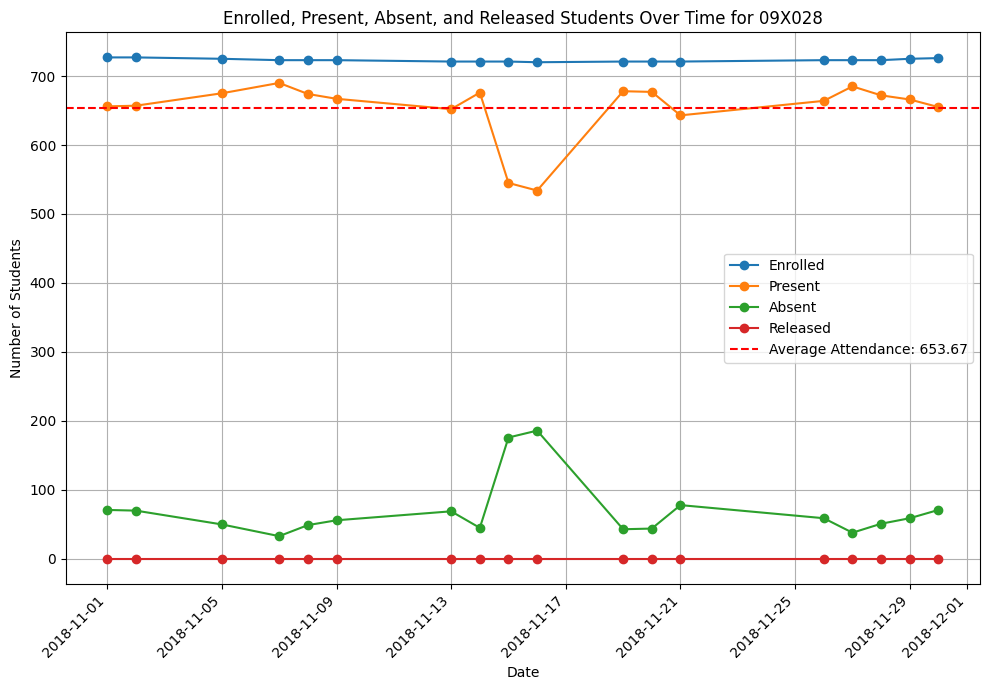

In [60]:
# Convert 'Date_new' column to datetime if it's not already
final_df['Formatted_Date'] = pd.to_datetime(final_df['Formatted_Date'])

# Filter final_df between minimum and maximum dates
min_date = final_df['Formatted_Date'].min()
max_date = final_df['Formatted_Date'].max()
filtered_df = final_df[(final_df['Formatted_Date'] >= min_date) & (final_df['Formatted_Date'] <= max_date)]

# Iterate over each unique school
for school_name, school_data in final_df.groupby('School DBN'):
    # Filter data for the current school
    school_data = school_data.copy()  # Make a copy to avoid modifying the original DataFrame
    # Group by 'Date_new' and calculate the sum of 'Enrolled', 'Present', 'Absent', and 'Released'
    grouped_df = school_data.groupby('Formatted_Date')[['Enrolled', 'Present', 'Absent', 'Released']].sum()
    #Calculate average attendance
    average_attendance = (grouped_df['Present'].mean() / grouped_df['Enrolled'].mean())*grouped_df['Enrolled'].mean()

    # Plotting
    plt.figure(figsize=(10, 7))
    grouped_df.plot(kind='line', marker='o', ax=plt.gca())  # ax=plt.gca() ensures the plot is drawn on the current Axes
    plt.axhline(y=average_attendance, color='r', linestyle='--', label=f'Average Attendance: {average_attendance:.2f}')
    plt.title(f'Enrolled, Present, Absent, and Released Students Over Time for {school_name}')
    plt.xlabel('Date')
    plt.ylabel('Number of Students')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

# Attendance Based on Daily Weather

<b>One of our questions was whether rain and snow leads to an increase in absences. We also wanted to see if different boroughs were affected by weather differently. 

We identified the attendance rate when there was more than 0.5 inches of rain or snow. This was then compared to the average attendance in each district. 

In [22]:
# Show number of days that met the condition when rain and snow occured over 0.5 inches #AA
df_rainsnow=df_lga[(df_lga.PRCP>0.5) | (df_lga.SNOW>0.5)]
df_rainsnow.shape #provides number of days that meet this condition

(210, 26)

In [23]:
# Select the rows in merged_data (school and weather data) when it rained or snowed over 0.5 inches
df_merged_rainsnow=merged_data[(merged_data.PRCP>0.5) | (merged_data.SNOW>0.5)]
#df_merged_rainsnow.shape

In [24]:
# Calculate attendance rate by borough of the days when it rained or snowed over 0.5 inches
borough_attendance_rs = df_merged_rainsnow.groupby('Borough')['Attendance_Rate'].mean().reset_index() 
borough_attendance_rs

Borough  Attendance_Rate
0          Bronx         0.866340
1       Brooklyn         0.878313
2      Manhatten         0.881751
3         Queens         0.907116
4  Staten Island         0.906835

In [25]:
df_rain=df_lga[(df_lga.PRCP>0.5)]
df_rain.shape #provides the number of rainy days

(184, 26)

In [26]:
# Select the rows in merged_data (school and weather data) when it rained over 0.5 inches
df_merged_rain=merged_data[merged_data.PRCP>1]
#df_merged_rain.shape

In [27]:
# Calculate attendance rate by borough of the days when it rained over 0.5 inches
borough_attendance_rain = df_merged_rain.groupby('Borough')['Attendance_Rate'].mean().reset_index() 
borough_attendance_rain

Borough  Attendance_Rate
0          Bronx         0.862780
1       Brooklyn         0.879999
2      Manhatten         0.879311
3         Queens         0.906840
4  Staten Island         0.913505

In [28]:
df_snow=df_lga[(df_lga.SNOW>0.5)]
df_snow.shape #provides number of days that meet this condition

(34, 26)

In [29]:
# Select the rows in merged_data (school and weather data) when it snowed over 0.5 inches
df_merged_snow=merged_data[merged_data.SNOW>0.5]
#df_merged_snow.shape

In [30]:
# Calculate attendance rate by borough of the days when it snowed over 0.5 inches
borough_attendance_snow = df_merged_snow.groupby('Borough')['Attendance_Rate'].mean().reset_index() 
borough_attendance_snow

Borough  Attendance_Rate
0          Bronx         0.824990
1       Brooklyn         0.851972
2      Manhatten         0.856874
3         Queens         0.888381
4  Staten Island         0.871378

In [31]:
# Create user defined function to merge data sets together based on borough
def merge_columns(a,b,suffix_1, suffix_2):
    return pd.merge(a, b, on='Borough', suffixes=(suffix_1,suffix_2), how='left')

In [32]:
# Merge the borough attendance rate data with attendance rate data calculated for each weather condition (rain or snow, rain, snow)
Weather_BAttendance = merge_columns(borough_attendance, borough_attendance_rs, "_Average", "_Rain or Snow")
Weather_BAttendance = merge_columns(Weather_BAttendance, borough_attendance_rain, "_Rain","")
Weather_BAttendance = merge_columns(Weather_BAttendance, borough_attendance_snow, "_Rain","_Snow")
Weather_BAttendance

Borough  Attendance_Rate_Average  Attendance_Rate_Rain or Snow  \
0          Bronx                 0.884277                      0.866340   
1       Brooklyn                 0.892721                      0.878313   
2      Manhatten                 0.893429                      0.881751   
3         Queens                 0.918502                      0.907116   
4  Staten Island                 0.918028                      0.906835   

   Attendance_Rate_Rain  Attendance_Rate_Snow  
0              0.862780              0.824990  
1              0.879999              0.851972  
2              0.879311              0.856874  
3              0.906840              0.888381  
4              0.913505              0.871378

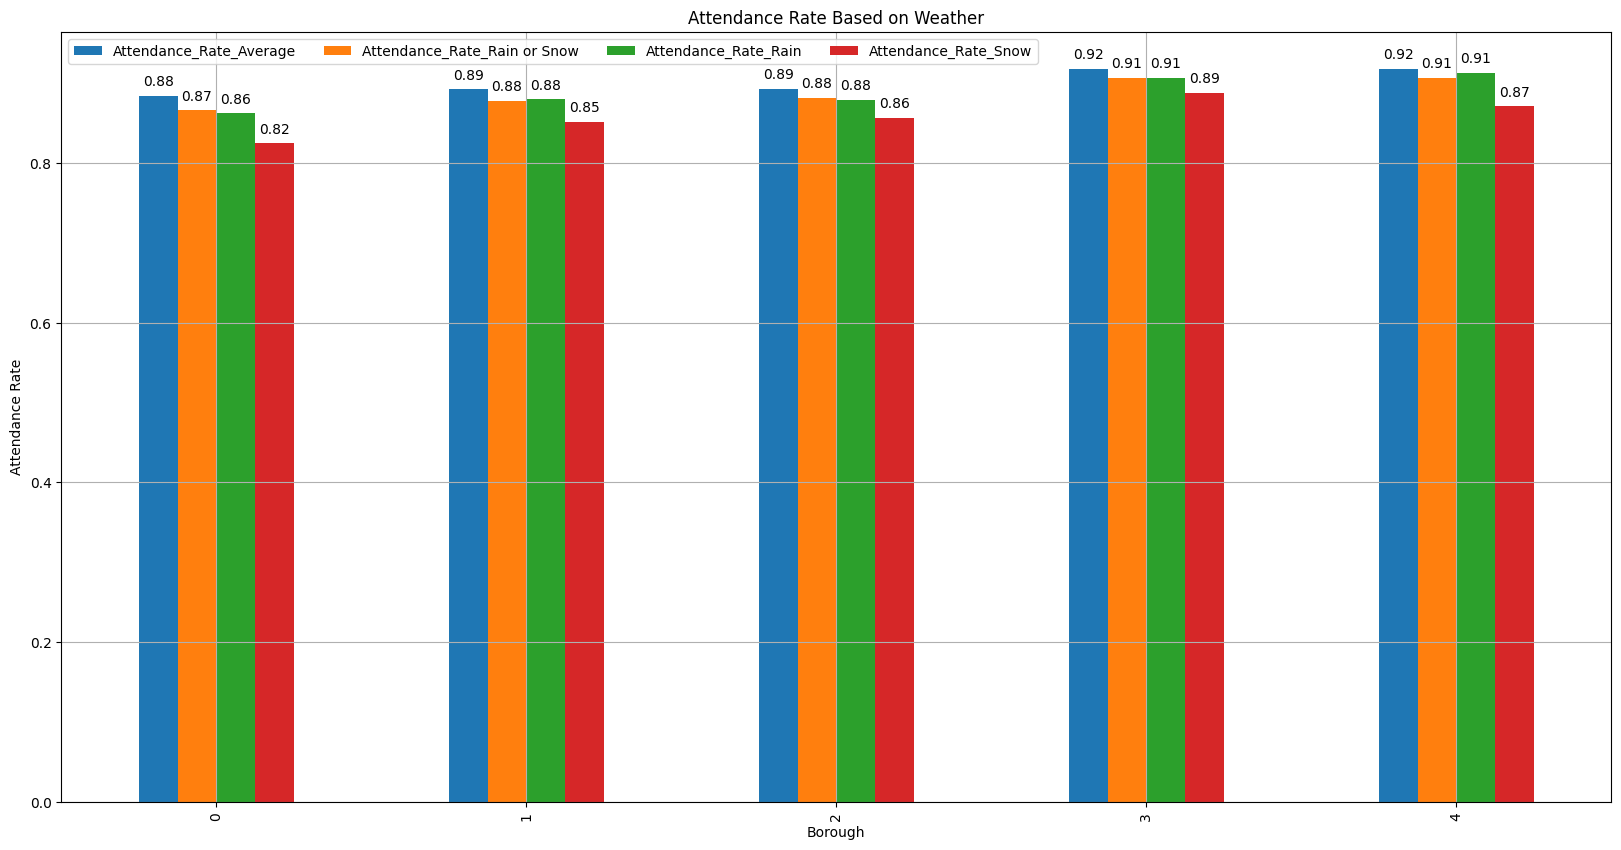

In [33]:
ax = Weather_BAttendance.plot(kind="bar", grid=True, title="Attendance Rate Based on Weather", figsize=(20,10))

# Add labels and title
plt.xlabel("Borough")
plt.ylabel("Attendance Rate")
plt.title("Attendance Rate Based on Weather")
plt.legend(loc='upper left', ncols=4)

# Add attendance rate on top of each bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

# Plotting all the schools on the Map

In [34]:
#This dataset has all school locations that we will be using in our map 
df4 = pd.read_csv('~/classdata/group02/Datasets/2019_-_2020_School_Locations_20240304.csv')

In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fiscal_year                        2190 non-null   int64  
 1   system_code                        2190 non-null   object 
 2   location_code                      2190 non-null   object 
 3   location_name                      2190 non-null   object 
 4   BEDS                               2190 non-null   int64  
 5   Managed_by_name                    2190 non-null   object 
 6   location_type_description          2190 non-null   object 
 7   Location_Category_Description      2190 non-null   object 
 8   Grades_text                        2103 non-null   object 
 9   Grades_final_text                  2102 non-null   object 
 10  open_date                          2190 non-null   object 
 11  Status_descriptions                2190 non-null   objec

In [36]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277153 entries, 0 to 277152
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   School DBN       277153 non-null  object 
 1   Enrolled         277153 non-null  int64  
 2   Absent           277153 non-null  int64  
 3   Present          277153 non-null  int64  
 4   Released         277153 non-null  int64  
 5   Formatted_Date   277153 non-null  object 
 6   Borough          277153 non-null  object 
 7   District         277153 non-null  object 
 8   School Number    277153 non-null  object 
 9   STATION          277153 non-null  object 
 10  NAME             277153 non-null  object 
 11  LATITUDE         277153 non-null  float64
 12  LONGITUDE        277153 non-null  float64
 13  ELEVATION        277153 non-null  float64
 14  DATE             277153 non-null  object 
 15  AWND             277153 non-null  float64
 16  PRCP             277153 non-null  floa

In [37]:
#Combining the attedance data set which has school code with location dataset which has school code as System Code. 5 new columns are being added to it
merged_df = pd.merge(merged_data, df4[['system_code', 'location_name','Administrative_District_Name','LONGITUDE','LATITUDE']], left_on='School DBN', right_on='system_code', how='inner')

In [38]:
#Removing any duplicate values for School. When we merged our dataset had every school day attendance data for every school. Since we are using this on a map we dont need
#300 days of attendance data but only the names and location of the unique school. 
unique_school_df = merged_df.drop_duplicates(subset=['School DBN'])
unique_school_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1579 entries, 0 to 285002
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   School DBN                    1579 non-null   object 
 1   Enrolled                      1579 non-null   int64  
 2   Absent                        1579 non-null   int64  
 3   Present                       1579 non-null   int64  
 4   Released                      1579 non-null   int64  
 5   Formatted_Date                1579 non-null   object 
 6   Borough                       1579 non-null   object 
 7   District                      1579 non-null   object 
 8   School Number                 1579 non-null   object 
 9   STATION                       1579 non-null   object 
 10  NAME                          1579 non-null   object 
 11  LATITUDE_x                    1579 non-null   float64
 12  LONGITUDE_x                   1579 non-null   float64
 13  E

In [39]:
unique_school_df.head()

School DBN  Enrolled  Absent  Present  Released Formatted_Date    Borough  \
0       01M015       172      19      153         0     2018-09-05  Manhatten   
178     01M019       243      21      222         0     2018-09-05  Manhatten   
356     01M020       483      38      445         0     2018-09-05  Manhatten   
534     01M034       308      59      249         0     2018-09-05  Manhatten   
712     01M063       220      11      209         0     2018-09-05  Manhatten   

    District School Number      STATION  ...   WDF2   WDF5  WSF2  WSF5  \
0         01           015  USW00014732  ...  180.0  180.0  17.0  21.9   
178       01           019  USW00014732  ...  180.0  180.0  17.0  21.9   
356       01           020  USW00014732  ...  180.0  180.0  17.0  21.9   
534       01           034  USW00014732  ...  180.0  180.0  17.0  21.9   
712       01           063  USW00014732  ...  180.0  180.0  17.0  21.9   

    Attendance_Rate  system_code                   location_name  \
0          0.889535       01M015       P.S. 015 Roberto Clemente   
178        0.913580       01M019             P.S. 019 Asher Levy   
356        0.921325       01M020            P.S. 020 Anna Silver   
534        0.808442       01M034  P.S. 034 Franklin D. Roosevelt   
712        0.950000       01M063       The STAR Academy - P.S.63   

     Administrative_District_Name  LONGITUDE_y  LATITUDE_y  
0    COMMUNITY SCHOOL DISTRICT 01   -73.978747   40.722075  
178  COMMUNITY SCHOOL DISTRICT 01   -73.984496   40.730009  
356  COMMUNITY SCHOOL DISTRICT 01   -73.986312   40.721305  
534  COMMUNITY SCHOOL DISTRICT 01   -73.975058   40.726008  
712  COMMUNITY SCHOOL DISTRICT 01   -73.986214   40.724440  

[5 rows x 32 columns]

In [40]:
map_center = [unique_school_df['LATITUDE_y'].iloc[0], unique_school_df['LONGITUDE_y'].iloc[0]] #Locates the map to the first row data of the dataframe 
my_map = folium.Map(location=map_center, zoom_start=10) #Created my map where we will be plotting all poitns 
folium.plugins.Geocoder().add_to(my_map)
# Create a MarkerCluster to add a large number of markers 
marker_cluster = MarkerCluster().add_to(my_map)
for index, row in unique_school_df.iterrows():
    lat, lon, school_name, Borough, District = row['LATITUDE_y'], row['LONGITUDE_y'], row['location_name'], row['Borough'], row['District']  
    # Create a marker with a popup for each school
    folium.Marker(
        location=[lat, lon],
        popup=f"School Name: {school_name}\nBorough: {Borough}\nDistrict: {District}", #Popualting each marker with School Name, Borough and District 
        icon=folium.Icon(),
    ).add_to(marker_cluster)
   
#Load GeoJSON data for NYC boroughs 
geojson_path = '~/classdata/group02/Datasets/School Districts.geojson'
boroughs = gpd.read_file(geojson_path)

# Add GeoJSON boundaries to the map https://python-visualization.github.io/folium/latest/user_guide/geojson/geojson.html
folium.GeoJson(boroughs).add_to(my_map) #if I comment this line it will remove the district boundaries 

my_map

In [61]:
# Unique Borough and District values
unique_boroughs = unique_school_df['Borough'].unique()
borough_dropdown = widgets.SelectMultiple(options=['All'] + list(unique_boroughs), description='Borough:')
district_dropdown = widgets.SelectMultiple(options=['All'], description='District:')
filtered_df=[] #Creating a global variable that we can use to plot only the selectd options 

# Function to update district dropdown based on selected borough
def update_district_dropdown(*args):
    selected_boroughs = borough_dropdown.value
    district_options = ['All'] + list(unique_school_df[unique_school_df['Borough'].isin(selected_boroughs)]['District'].unique())
    district_dropdown.options = district_options

# Linking the function to the dropdown value
borough_dropdown.observe(update_district_dropdown, 'value')

# Function to filter and display DataFrame based on selected values
def filter_dataframe(boroughs, districts):
    global filtered_df
    if 'All' in boroughs:
        filtered_df = unique_school_df.copy()
    else:
        filtered_df = unique_school_df[unique_school_df['Borough'].isin(boroughs)].copy()
        
    if 'All' not in districts:
        filtered_df = filtered_df[filtered_df['District'].isin(districts)]
        
    display(filtered_df)
    return filtered_df
# Calling filter_dataframe function when both values are selected
widgets.interactive(filter_dataframe, boroughs=borough_dropdown, districts=district_dropdown)

interactive(children=(SelectMultiple(description='Borough:', options=('All', 'Manhatten', 'Bronx', 'Queens', '…

In [62]:
#This will create a new map where we can only plot the filtered schools from the widget
map_center = [unique_school_df['LATITUDE_y'].iloc[0], filtered_df['LONGITUDE_y'].iloc[0]]
my_map = folium.Map(location=map_center, zoom_start=10)
folium.plugins.Geocoder().add_to(my_map)

marker_cluster = MarkerCluster().add_to(my_map)
for index, row in filtered_df.iterrows():
    lat, lon, school_name, Borough, District = row['LATITUDE_y'], row['LONGITUDE_y'], row['location_name'], row['Borough'], row['District']
    folium.Marker(
        location=[lat, lon],
        popup=f"School Name: {school_name}\nBorough: {Borough}\nDistrict: {District}",
        icon=folium.Icon(),
    ).add_to(marker_cluster)
my_map

# Prediction


In [44]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277153 entries, 0 to 277152
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   School DBN       277153 non-null  object 
 1   Enrolled         277153 non-null  int64  
 2   Absent           277153 non-null  int64  
 3   Present          277153 non-null  int64  
 4   Released         277153 non-null  int64  
 5   Formatted_Date   277153 non-null  object 
 6   Borough          277153 non-null  object 
 7   District         277153 non-null  object 
 8   School Number    277153 non-null  object 
 9   STATION          277153 non-null  object 
 10  NAME             277153 non-null  object 
 11  LATITUDE         277153 non-null  float64
 12  LONGITUDE        277153 non-null  float64
 13  ELEVATION        277153 non-null  float64
 14  DATE             277153 non-null  object 
 15  AWND             277153 non-null  float64
 16  PRCP             277153 non-null  floa

In [45]:
correlation_data = merged_data[['Absent', 'PRCP', 'SNOW']]
correlation_matrix = correlation_data.corr()
print(correlation_matrix)

          Absent      PRCP      SNOW
Absent  1.000000  0.052139  0.056991
PRCP    0.052139  1.000000  0.210018
SNOW    0.056991  0.210018  1.000000


In [46]:
#Part 1 running linear regression 
Borough_key = {'Manhatten': 1, 'Bronx': 2, 'Brooklyn': 3, 'Queens': 4, 'Staten Island': 5}
merged_data.Borough = merged_data.Borough.map(Borough_key)
features = ['Enrolled', 'Borough', 'District', 'AWND', 'PRCP', 'SNOW', 'TAVG','TMAX','TMIN']
target = ['Present']         # assigning features and target 
X = merged_data[features]
y = merged_data[target]

In [47]:
from sklearn.model_selection import train_test_split             # splitting and training the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((221722, 9), (221722, 1), (55431, 9), (55431, 1))

In [48]:
from sklearn.linear_model import LinearRegression               # fitting the data

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
training_score = lr.score(X_train, y_train)              # accuracy scores for training and testing data
testing_score = lr.score(X_test, y_test)   
training_score, testing_score

(0.9851335053515349, 0.9874515274324284)

In [50]:
a = {'Enrolled': 257,
     'Borough': 1,                            # adding new data to dataframe to test the model
     'District': 1,
     'AWND': 12.32,
     'PRCP': .25,
     'SNOW': 3.7,
     'TAVG': 54,
     'TMAX': 67,
     'TMIN': 41}

new = [a['Enrolled'], a['Borough'], a['District'], a['AWND'], a['PRCP'], a['SNOW'], a['TAVG'], a['TMAX'], a['TMIN']]
X_new = new
features = ['Enrolled', 'Borough', 'District', 'AWND', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN']

import numpy as np

X_new = pd.DataFrame(data=np.array(X_new).reshape(1, -1), columns=features)

import pandas as pd
X_new = pd.DataFrame(data=X_new, columns=features)  # creating a dataframe for new data points
X_new

Enrolled  Borough  District   AWND  PRCP  SNOW  TAVG  TMAX  TMIN
0     257.0      1.0       1.0  12.32  0.25   3.7  54.0  67.0  41.0

In [51]:
prediction = lr.predict(X_new)          # prediction using linear regression model
a = float(prediction[0][0])
print(a)
print("Attendance % =",a / X_new['Enrolled'])

194.42811343516635
Attendance % = 0    0.75653
Name: Enrolled, dtype: float64


# Further Investigation: Heat Maps

In [52]:

# Global variable to store the final DataFrame
final_df = None
print("Manhatten: 1, Bronx: 2, Brooklyn: 3, Queens: 4, Staten Island: 5")
# Function to update district options based on selected borough
def update_district_options(change):
    borough = borough_widget.value
    district_widget.options = merged_data[merged_data['Borough'] == borough]['District'].unique()

# Function to update school number options based on selected district
def update_school_number_options(change):
    borough = borough_widget.value
    district = district_widget.value
    school_number_widget.options = merged_data[(merged_data['Borough'] == borough) & (merged_data['District'] == district)]['School Number'].unique()

# Function to create the final DataFrame
def create_final_df(borough, district, school_number):
    global final_df
    final_df = merged_data[(merged_data['Borough'] == borough) & (merged_data['District'] == district) & (merged_data['School Number'] == school_number)]
    display(final_df)

# Create widgets
borough_widget = widgets.Dropdown(description='Borough:', options=merged_data['Borough'].unique())
district_widget = widgets.Dropdown(description='District:')
school_number_widget = widgets.Dropdown(description='School Number:')

# Register update_district_options and update_school_number_options as the callback functions for changes in borough and district
borough_widget.observe(update_district_options, 'value')
borough_widget.observe(update_school_number_options, 'value')
district_widget.observe(update_school_number_options, 'value')

# Create button to trigger creation of final DataFrame
create_df_button = widgets.Button(description='Create DataFrame')

def create_df_button_clicked(button):
    create_final_df(borough_widget.value, district_widget.value, school_number_widget.value)

# Register create_df_button_clicked as the callback function for button clicks
create_df_button.on_click(create_df_button_clicked)

# Display widgets
display(borough_widget, district_widget, school_number_widget, create_df_button)


Manhatten: 1, Bronx: 2, Brooklyn: 3, Queens: 4, Staten Island: 5


Dropdown(description='Borough:', options=(1, 2, 4, 3, 5), value=1)

Dropdown(description='District:', options=(), value=None)

Dropdown(description='School Number:', options=(), value=None)

Button(description='Create DataFrame', style=ButtonStyle())

In [53]:
final_df.head()

School DBN  Enrolled  Absent  Present  Released Formatted_Date  \
207742     26Q046       553      25      528         0     2018-09-05   
207743     26Q046       554      20      534         0     2018-09-06   
207744     26Q046       555      13      542         0     2018-09-07   
207745     26Q046       558      11      547         0     2018-09-12   
207746     26Q046       558       3      555         0     2018-09-13   

        Borough District School Number      STATION  ... SNOW  SNWD  TAVG  \
207742        4       26           046  USW00014732  ...  0.0   0.0    85   
207743        4       26           046  USW00014732  ...  0.0   0.0    85   
207744        4       26           046  USW00014732  ...  0.0   0.0    76   
207745        4       26           046  USW00014732  ...  0.0   0.0    74   
207746        4       26           046  USW00014732  ...  0.0   0.0    73   

        TMAX  TMIN   WDF2   WDF5  WSF2  WSF5  Attendance_Rate  
207742  91.0  79.0  180.0  180.0  17.0  21.9         0.954792  
207743  96.0  76.0   10.0   10.0  28.0  38.0         0.963899  
207744  77.0  71.0   40.0   60.0  19.9  23.9         0.976577  
207745  78.0  72.0   50.0   70.0  15.0  21.0         0.980287  
207746  77.0  70.0   60.0   60.0  17.0  23.0         0.994624  

[5 rows x 27 columns]

/tmp/ipykernel_1002/147069794.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_df.corr()


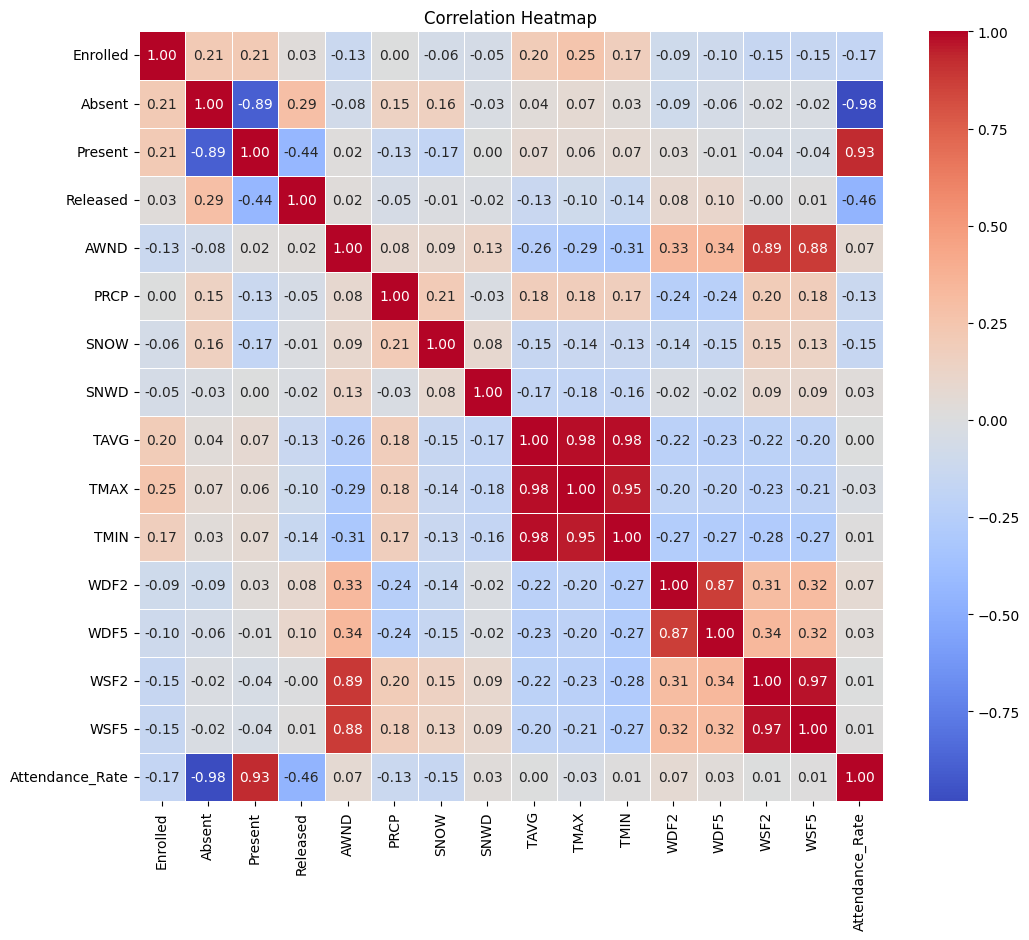

Best Features:
Attendance_Rate    0.926911
Enrolled           0.213339
TAVG               0.072610
TMIN               0.068136
TMAX               0.061692
Name: Present, dtype: float64


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
final_df = final_df.drop(["Borough", "LATITUDE", "LONGITUDE", "ELEVATION"], axis=1)
# Calculate the correlation matrix
correlation_matrix = final_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Identify the features highly correlated with the target variable
target_variable = 'Present'
best_features = correlation_matrix[target_variable].sort_values(ascending=False)[1:6]  # Excluding the target variable itself
print("Best Features:")
print(best_features)

In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 207742 to 207919
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   School DBN       178 non-null    object 
 1   Enrolled         178 non-null    int64  
 2   Absent           178 non-null    int64  
 3   Present          178 non-null    int64  
 4   Released         178 non-null    int64  
 5   Formatted_Date   178 non-null    object 
 6   District         178 non-null    object 
 7   School Number    178 non-null    object 
 8   STATION          178 non-null    object 
 9   NAME             178 non-null    object 
 10  DATE             178 non-null    object 
 11  AWND             178 non-null    float64
 12  PRCP             178 non-null    float64
 13  SNOW             178 non-null    float64
 14  SNWD             178 non-null    float64
 15  TAVG             178 non-null    int64  
 16  TMAX             178 non-null    float64
 17  TMIN    

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# Select relevant columns
features = final_df.drop(['Absent', 'Attendance_Rate', 'Present','Formatted_Date','District','School Number','School DBN','NAME','DATE','STATION','NAME','WDF2','WDF5','WSF5','WSF2'], axis=1)  # Dropping the target variable 'Present' as well
target = final_df['Present']

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
for column in features.columns:
    if features[column].dtype == 'object':
        features[column] = label_encoder.fit_transform(features[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.6, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Get coefficients and feature names
coefficients = model.coef_
feature_names = features.columns


# Combine feature names with coefficients
coefficients_with_names = zip(feature_names, coefficients)

# Print coefficients with corresponding feature names
for feature_name, coefficient in coefficients_with_names:
    print(f"{feature_name}: {coefficient}")

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate R-squared
predictions_test = model.predict(X_test)
r_squared = r2_score(y_test, predictions_test)
print("R-squared:", r_squared)


Enrolled: -0.7833930854646995
Released: -9.43689570931383e-15
AWND: 0.033969362783756486
PRCP: 2.0622085767348843
SNOW: 8.208600840502816
SNWD: 0.5605844167192608
TAVG: -0.04302914269973134
TMAX: -0.25063767437055956
TMIN: 0.2872879633486929
Mean Squared Error: 146.97601366199112
R-squared: -0.4853125224343433
